In [2]:
#1 - SVM Basics

In [38]:
'''
1.1  Extract a new dataset that only contains ’setosa’, (0) 
and ’versicolor’ (1) samples and name it as Iris_binary_data.cvs 
(we call it iris binary data)
'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.datasets import load_iris
import time
import seaborn as sb
import pandas as pd

iris = load_iris()

x = iris.data[:100]
y = np.reshape(iris.target[:100], (100,1))
x_ = iris.data[:]
y_ = np.reshape(iris.target[:], (150,1))

#Normalize Data
x_norm = stats.zscore(x)
x_names = list(x)

#pd version of data
iris_x_norm = pd.DataFrame(x_norm, columns=x_names) 


data = np.append(iris_x_norm, y, axis = 1)

df = pd.DataFrame(data)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
df.to_csv("Iris_binary_data.csv")

C:\Users\Yofftop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuray of linear is: 1.0


accuray of rbf is: 1.0


accuray of poly is: 1.0


accuray of sigmoid is: 0.43333333333333335




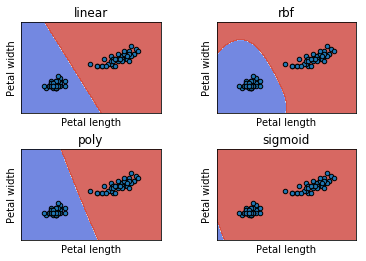

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import warnings

'''
1.2 Compare SVM classiﬁcation under four kernels : ’linear’, 
’rbf’, ’poly’, ’sigmoid’ via a data visualization approach 
for iris binary data (2 dimensional data). 
(a) Your data visualization should clearly mark the decision boundaries. 
(b) You also need to draw a conclusion about
the impacts of these kernels on the classiﬁcation results.
'''

def svmachine(kernel, xdata, ydata):

    test_percent = 0.3

    training_data, test_data, training_data_label, test_data_label = train_test_split(xdata, ydata, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)

    #predictions
    predictions = svm_learning_machine.predict(test_data)
 
    #check learning accuracy
    learning_accuracy = svm_learning_machine.score(test_data, test_data_label)
    
    return learning_accuracy

def make_meshgrid(x, y, h=.02):
    #create mesh of points
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(xdata, ydata, ax, kernel, xx, yy, **params):

    test_percent = 0.3

    training_data, test_data, training_data_label, test_data_label = train_test_split(xdata, ydata, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)
    
    Z = svm_learning_machine.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

models = ['linear', 'rbf', 'poly', 'sigmoid']

# svmachine('linear', x, y)

#Set up grid for plotting
fig,sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x1 = x[:, 2:]
# x1 = x
y1 = y

X0, X1 = x1[:,0], x1[:,1]
xx, yy = make_meshgrid(X0, X1)

#plot
#Question - do we need to plot all dimensions?
for kernel, ax in zip(models, sub.flatten()):
    plot_contours(x1, y1, ax, kernel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(kernel)

#accuracy
for i in models:
    print("accuray of " + i + " is: " + str(svmachine(i, x, y)))
    print("\n")

    
warnings.filterwarnings(action='once')

In [5]:
'''
1.3 
Partition Iris binary data into training data that counts 55% of the 
total data and test data that counts 45% of the total data. Conduct SVM
classiﬁcation under such a setting and compute the following classiﬁcation 
measures: accuracy, sensitivity, speciﬁcity, positive predictive ratios (PPR) 
and negative predictive ratios. (Note: you need to use all the four kernels)
'''



'\n1.3 \nPartition Iris binary data into training data that counts 55% of the \ntotal data and test data that counts 45% of the total data. Conduct SVM\nclassiﬁcation under such a setting and compute the following classiﬁcation \nmeasures: accuracy, sensitivity, speciﬁcity, positive predictive ratios (PPR) \nand negative predictive ratios. (Note: you need to use all the four kernels)\n'

In [37]:
def compute_measure(predicted_label, true_label):
    t_idx = (predicted_label == true_label) # truely predicted
    f_idx = np.logical_not(t_idx) # falsely predicted
    p_idx = (true_label > 0) # positive targets
    n_idx = np.logical_not(p_idx) # negative targets
    tp = np.sum( np.logical_and(t_idx, p_idx)) # TP
    tn = np.sum( np.logical_and(t_idx, n_idx)) # TN
    # false positive: original negative but classified as positive
    # false negative: original positive but classified as negative
    fp = np.sum(n_idx) - tn
    fn = np.sum(p_idx) - tp

    tp_fp_tn_fn_list=[]
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list=np.array(tp_fp_tn_fn_list)
    tp=tp_fp_tn_fn_list[0]
    fp=tp_fp_tn_fn_list[1]
    tn=tp_fp_tn_fn_list[2]
    fn=tp_fp_tn_fn_list[3]
    with np.errstate(divide='ignore'):
        sen = (1.0*tp)/(tp+fn)
    with np.errstate(divide='ignore'):
        spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide='ignore'):
        ppr = (1.0*tp)/(tp+fp)
    with np.errstate(divide='ignore'):
        npr = (1.0*tn)/(tn+fn)

    acc = (tp+tn)*1.0/(tp+fp+tn+fn)
    ans=[]
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)

    return ans

def svmachine_classmeasures(kernel, xdata, ydata):

    test_percent = 0.45

    training_data, test_data, training_data_label, test_data_label = train_test_split(xdata, ydata, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)

    #predictions
    predictions = svm_learning_machine.predict(test_data)
     
    predicted_label = np.array(predictions)
    true_label = np.array(test_data_label)
    ans = compute_measure(predicted_label, true_label)
    
    print("\n check the following classiciation measures: accuracy, sen, spec, ppr, npr\n")
    print("{}".format(ans))

    
for i in models:
    print(i)
    print(svmachine_classmeasures(i, x, y))
#     print("accuray of " + i + " is: " + str(svmachine(i, x, y)))
    print("\n")

linear

 check the following classiciation measures: accuracy, sen, spec, ppr, npr

[23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489]
None


rbf

 check the following classiciation measures: accuracy, sen, spec, ppr, npr

[23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489]
None


poly

 check the following classiciation measures: accuracy, sen, spec, ppr, npr

[23.4, 18.0, 27.0, -0.8571428571428571, 1.7234042553191489]
None


sigmoid

 check the following classiciation measures: accuracy, sen, spec, ppr, npr

[18.0, 45.0, 0.0, 0.967741935483871, -0.0]
None




C:\Users\Yofftop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
def svmachine_multiclass(kernel, xdata, ydata):

    test_percent = 0.3

    training_data, test_data, training_data_label, test_data_label = train_test_split(xdata, ydata, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1, decision_function_shape='ovo')
    svm_learning_machine.fit(training_data, training_data_label)

    #predictions
    predictions = svm_learning_machine.predict(test_data)
 
    #check learning accuracy
    learning_accuracy = svm_learning_machine.score(test_data, test_data_label)
    
    return learning_accuracy


for i in models:
    print("accuray of " + i + " is: " + str(svmachine_multiclass(i, x_, y_)))
    print("\n")
    
warnings.filterwarnings(action='once')

accuray of linear is: 1.0


accuray of rbf is: 1.0


accuray of poly is: 1.0


accuray of sigmoid is: 0.28888888888888886




C:\Users\Yofftop\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
from scipy import stats
from sklearn import metrics

#2 - Credit Risk Analysis

credit_df = pd.read_csv('credit_risk_data_balanced.csv')
credit_y = credit_df.iloc[:,0]
credit_x = credit_df.iloc[:,1:]

#Normalize Data
x_norm = stats.zscore(credit_x)
x_names = list(credit_x)

#pd version of data
credit_x_norm = pd.DataFrame(x_norm, columns=x_names) 

'''
2.1 Partition data as 80% for training and 20% for testing and use K-NN, 
to conduct credit risk analytics, 
i.e. do classiﬁcation to determine good or bad credit records.
'''

test_percent = 0.20

training_data, test_data, training_data_label, test_data_label = train_test_split(credit_x_norm, credit_y, test_size = test_percent, random_state = 42)

k_list = [15]

TP = 0
TN = 0
FP = 0
FN = 0

for nb in k_list:
    ## 1. specify the strcutures/parameters of KNN
    kNN = neighbors.KNeighborsClassifier(nb, weights='distance', algorithm='auto')
    ## 2. training kNN with training data
    kNN.fit(training_data, training_data_label)
    ## 3. prediction for test data
    prediction = kNN.predict(test_data)

    predicted_label = np.array(prediction)
    true_label = np.array(test_data_label)
    ans = compute_measure(predicted_label, true_label)
    
    print(ans)    
    print(metrics.classification_report(predicted_label, true_label))
    
    for i,j in zip(true_label, predicted_label):
        
        if i == -1 and j == -1:
            TP += 1
        
        if i == 1 and j == 1:
            TN += 1
            
        if i == 1 and j == -1:
            FP += 1
        
        if i == -1 and j == 1:
            FN += 1
    
    print(TP, TN, FP, FN)


[0.6497158241100808, 0.5305023923444976, 0.7690005984440454, 0.6967792615868028, 0.6207729468599034]
             precision    recall  f1-score   support

         -1       0.77      0.62      0.69      2070
          1       0.53      0.70      0.60      1273

avg / total       0.68      0.65      0.65      3343

1285 887 785 386


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.svm import SVR

#3 - Selective Learning Analytics

#Clean Data

option_df_raw = pd.read_csv('NBoption.csv')
corr = option_df_raw.corr()
corr.style.background_gradient
# print(corr)

option_df_ftselect = option_df_raw.loc[:,['StockPrice','Strike','Volatility','time_to_maturity','ImpliedVolatility']]

def selective_learning(option_df):
    if 'DataType' in list(option_df):
        for row in range(len(option_df)):    
            if option_df['DataType'][row] == 'put':        
                option_df.set_value(row,'DataType',1.0)

            else:
                option_df.set_value(row,'DataType',0.0)

    option_y = option_df.iloc[:,-1]
    option_x = option_df.iloc[:,:-1]

    #Normalize Data
    x_norm = stats.zscore(option_x.astype(float))
    x_names = list(option_x)

    #pd version of data
    option_x_norm = pd.DataFrame(x_norm, columns=x_names) 

    #Split into train and test
    test_percent = 0.20
    training_data, test_data, training_data_label, test_data_label = train_test_split(option_x_norm, option_y, test_size = test_percent, random_state = 42)

    #Split into train-train and train-test
    training_data_train, training_data_test, training_data_label_train, training_data_label_test = train_test_split(training_data, training_data_label, test_size = test_percent, random_state = 42)

    def MSE(actual, predict):

        tot_error = 0
        error_list = []

        for i,j in zip(actual, predict):
            error = (i - j)**2
            tot_error += error
            error_list.append(error)
        MSE = tot_error / len(predict)

        return MSE, error_list

    def KNNreg(k, train_data, test_data, train_label):

        #KNN Regressor to find bad guys
        kNN = KNeighborsRegressor(n_neighbors=k)
        kNN.fit(train_data, train_label)
        test_response = kNN.predict(test_data)

        return test_response
    
    def SVMreg(method, train_data, test_data, train_label):
        
        clf = SVR(kernel = method)
        clf.fit(train_data, train_label)
        
        predictions = clf.predict(test_data)
        
        return predictions
    
    ##########
    
#     svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
#     svm_learning_machine.fit(training_data, training_data_label)

#     #predictions
#     predictions = svm_learning_machine.predict(test_data)

    
    ##########
    
    

    MSE_all_before, e_list_all = MSE(test_data_label, KNNreg(10, training_data, test_data, training_data_label))
    print("KNN")
    print("Before Cleaning")
    print(MSE_all_before)
    print(training_data.shape)
    print("\n")
    
    MSE_all_before, e_list_all = MSE(test_data_label, SVMreg('rbf', training_data, test_data, training_data_label))
    print("SVM")
    print("Before Cleaning")
    print(MSE_all_before)
    print(training_data.shape)
    print("\n")
    

    #Run model on training data only
    MSE_train, e_list = MSE(training_data_label_test, KNNreg(10, training_data_train, training_data_test, training_data_label_train))

    #Get rid of bottom 10% *the bad guys*
    a = np.array(e_list)
    p = np.percentile(a, 90)

    bad_guys_index = []

    for i in range(len(e_list)):

        if e_list[i] > p:
            bad_guys_index.append(training_data_train.index.values[i])

    option_df_clean = option_df.drop(bad_guys_index)

    #Re-Run the model on new data set
    option_y = option_df_clean.iloc[:,-1]
    option_x = option_df_clean.iloc[:,:-1]

    #Normalize Data
    x_norm = stats.zscore(option_x.astype(float))
    x_names = list(option_x)

    #pd version of data
    option_x_norm = pd.DataFrame(x_norm, columns=x_names) 

    #Split into train and test
    test_percent = 0.20
    training_data_clean, test_data_clean, training_data_label_clean, test_data_label_clean = train_test_split(option_x_norm, option_y, test_size = test_percent, random_state = 42)

    #Run model on all data
    MSE_all_after, e_list_all = MSE(test_data_label_clean, KNNreg(10, training_data_clean, test_data_clean, training_data_label_clean))
    print("KNN")
    print("After Cleaning")
    print(MSE_all_after)
    print(training_data_clean.shape)
    print("\n")

    MSE_all_after, e_list_all = MSE(test_data_label_clean, SVMreg('rbf', training_data_clean, test_data_clean, training_data_label_clean))
    print("SVM")
    print("After Cleaning")
    print(MSE_all_after)
    print(training_data_clean.shape)
    print("\n")

selective_learning(option_df_raw)

# selective_learning(option_df_ftselect)

C:\Users\Yofftop\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


KNN
Before Cleaning
0.10091245030417662
(11402, 9)


SVM
Before Cleaning
0.11172202812901046
(11402, 9)


KNN
After Cleaning
0.09922760715069164
(11220, 9)


SVM
After Cleaning
0.10634161804396747
(11220, 9)




In [62]:
from sklearn.model_selection import cross_val_score

#4 - Credit Risk Analytics

data = pd.read_csv('credit_data_.csv')

#Normalize Data
data_norm = stats.zscore(data)

#pd version of data
data = pd.DataFrame(data_norm).iloc[:,:-1]

print(data.shape)

#Add Labels
good = np.ones(1540)
bad = np.zeros(129)

labels = np.append(good,bad)

label = pd.DataFrame(labels)
models = ['linear', 'rbf', 'poly', 'sigmoid']

for m in models:
    kernel=m;
    clf = svm.SVC(kernel=kernel, gamma=0.5, C=1)
    k=10 # total folders
    scores = cross_val_score(clf, data, label, cv=k)
    print("\n k={:d}".format(k) + " fold cross validation\n")
    print("SVM classification under kernel ** " + str(kernel) + " ** is:\n\n" +
    str(scores))

    
warnings.filterwarnings(action='ignore')

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

(1669, 5)

 k=10 fold cross validation

SVM classification under kernel ** linear ** is:

[1.         1.         1.         1.         1.         1.
 1.         0.98802395 1.         0.9939759 ]

 k=10 fold cross validation

SVM classification under kernel ** rbf ** is:

[0.99401198 1.         1.         1.         0.99401198 1.
 1.         0.98802395 0.99401198 0.98795181]

 k=10 fold cross validation

SVM classification under kernel ** poly ** is:

[1.         1.         1.         1.         0.99401198 1.
 1.         0.99401198 1.         0.9939759 ]

 k=10 fold cross validation

SVM classification under kernel ** sigmoid ** is:

[0.92215569 0.92215569 0.91616766 0.91616766 0.8742515  0.88622754
 0.81437126 0.73053892 0.76047904 0.81927711]


accuray of linear is: 1.0


accuray of rbf is: 0.9940119760479041


accuray of poly is: 0.9960079840319361


accuray of sigmoid is: 0.846307385229541




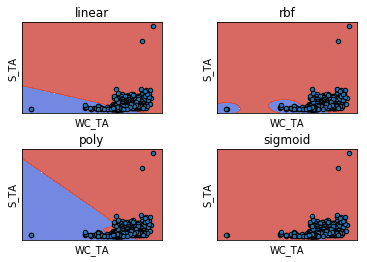

In [66]:
def svmachine(kernel, xdata, ydata):

    test_percent = 0.3

    training_data, test_data, training_data_label, test_data_label = train_test_split(data, label, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)

    #predictions
    predictions = svm_learning_machine.predict(test_data)
 
    #check learning accuracy
    learning_accuracy = svm_learning_machine.score(test_data, test_data_label)
    
    return learning_accuracy

def make_meshgrid(x, y, h=.02):
    #create mesh of points
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(xdata, ydata, ax, kernel, xx, yy, **params):

    test_percent = 0.3

    training_data, test_data, training_data_label, test_data_label = train_test_split(xdata, ydata, test_size = test_percent, random_state = 42)

    #build SVM learning machines
    svm_learning_machine = svm.SVC(kernel = kernel, tol=0.0001, gamma = 0.5, C=1)
    svm_learning_machine.fit(training_data, training_data_label)
    
    Z = svm_learning_machine.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

models = ['linear', 'rbf', 'poly', 'sigmoid']

# svmachine('linear', x, y)

#Set up grid for plotting
fig,sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x1 = np.array(data)[:,[0,4]]
# x1 = x
y1 = np.array(label)

X0, X1 = x1[:,0], x1[:,1]
xx, yy = make_meshgrid(X0, X1)

#plot
#Question - do we need to plot all dimensions?
for kernel, ax in zip(models, sub.flatten()):
    plot_contours(x1, y1, ax, kernel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('WC_TA')
    ax.set_ylabel('S_TA')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(kernel)

#accuracy
for i in models:
    print("accuray of " + i + " is: " + str(svmachine(i, data, label)))
    print("\n")
